In [1]:
import pandas as pd
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

data, meta = arff.loadarff(r'C:\Users\gzmce\OneDrive - Firat University\Masaüstü\artificalGerekli\cluto-t7-10k.arff')
df = pd.DataFrame(data)
df

,x,y,CLASS
0,539.512024,411.975006,b'1'
1,542.241028,147.626007,b'2'
2,653.468994,370.727997,b'0'
3,598.585999,284.882996,b'1'
4,573.062988,294.562988,b'1'
...,...,...,...
9995,451.783997,372.544006,b'6'
9996,550.674988,327.447998,b'1'
9997,474.742004,161.518005,b'3'
9998,535.835022,375.765991,b'1'


In [2]:
pd.DataFrame(data)["CLASS"].value_counts()

CLASS
b'6'        2758
b'1'        2230
b'8'        1040
b'7'         994
b'noise'     792
b'3'         625
b'2'         611
b'4'         346
b'5'         335
b'0'         269
Name: count, dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler

# Sayısal verileri al
X = np.column_stack((data['x'], data['y']))

# Standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
data_pd = pd.DataFrame(data)
data_pd["CLASS"] = data_pd["CLASS"].apply(lambda c : c.decode("utf-8"))
data_pd["CLASS"] = data_pd["CLASS"].apply(lambda c : int(c) if c != 'noise' else -1)
data_pd #classları sayısal yaptık.

,x,y,CLASS
0,539.512024,411.975006,1
1,542.241028,147.626007,2
2,653.468994,370.727997,0
3,598.585999,284.882996,1
4,573.062988,294.562988,1
...,...,...,...
9995,451.783997,372.544006,6
9996,550.674988,327.447998,1
9997,474.742004,161.518005,3
9998,535.835022,375.765991,1


### k means clustering

In [5]:
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=9, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [6]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(data_pd["CLASS"],y_kmeans) 


0.5731125752103355

In [7]:
import time

start = time.time()

kmeans = KMeans(n_clusters=9, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 0.0283 saniye


### agglomerative clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=9)
labels_agg = agg.fit_predict(X_scaled)

In [9]:
normalized_mutual_info_score(data_pd["CLASS"],labels_agg) 


0.5547823034649557

In [10]:
import time

start = time.time()

agg = AgglomerativeClustering(n_clusters=9)
labels_agg = agg.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 4.7496 saniye


### dbscan clustering

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Kategorik sütunları decode et (gerekliyse)
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

# X ve Y özelliklerini al
X = df.iloc[:, [0, 1]].values

# Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN modelini oluştur
dbscan = DBSCAN(eps=0.2, min_samples=150)
labels = dbscan.fit_predict(X_scaled)

In [74]:
normalized_mutual_info_score(data_pd["CLASS"],labels) 


0.7607214617454544

In [62]:
import time

start = time.time()

dbscan = DBSCAN(eps=0.2, min_samples=100)
labels = dbscan.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 0.2130 saniye


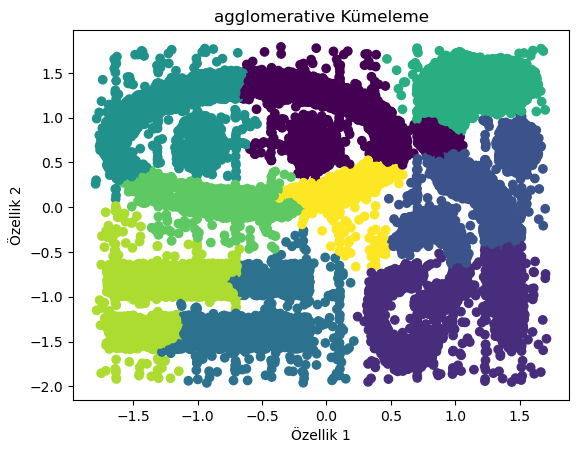

In [63]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='viridis')
plt.title('agglomerative Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

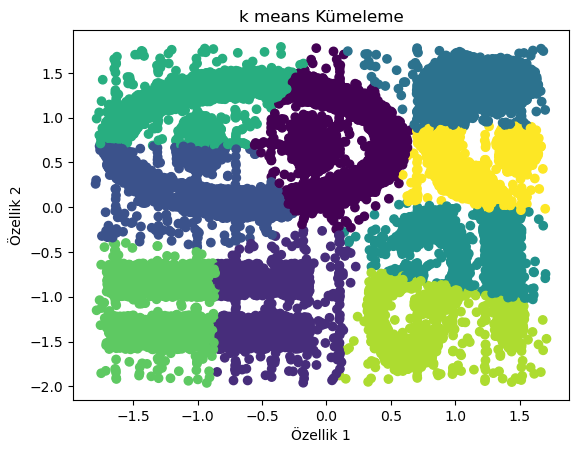

In [64]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title('k means Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

In [65]:
# burada k means, agglomerative ve meanshift yaklaşık olarak 0.5 skor değerlerini verdiler. grafiklerine baktığımızdda ise farklı şekillerde kümeleme yapılmış. aralarında en yavaşı mean shift oldu.

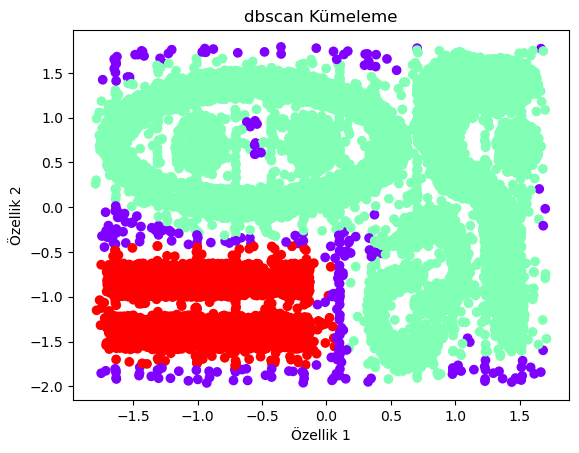

In [66]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
plt.title('dbscan Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()